## **Project Description**:
A café with robotic waiters is set to open in Los Angeles—an innovative but high-cost concept. Potential investors are interested in understanding the market conditions and the feasibility of sustaining success even after the initial novelty appeal fades.

Therefore, it will be necessary to **conduct a market analysis using open data on restaurants in Los Angeles**. This data will help identify trends, assess competition, and provide insights to support the investors' decision-making process. The Datasets are available in the 'dataset' folder of this repository for reference and analysis.

**Index**
1. Data Dictionary
2. Data Loading
3. Data Preprocessing
4. Exploratory Data Analysis

    4.1. Proportions of Establishment Types (Chart) 

    4.2. Proportions of Chain vs. Non-Chain Establishments (Chart) 

    4.3. Typical Characteristics of Chain Establishments

    4.4. Chain Characteristics: Small vs. Large Establishments

    4.5. Average Number of Seats by Restaurant Type (Charts)

    4.6. Extraction of Street Names from the Address Columnv  

    4.7. Chart of the Top 10 Streets with the Most Restaurants  
    
    4.8. Identification of Streets with Only One Restaurant
    - Distribution Chart of Restaurants by Street
    
    4.9. Distribution of Seats on Streets with Many Restaurants 

    4.10. Conclusion and Recommendations on Restaurant Type, Number of Seats, and Chain Feasibility

## 1.**Data Dictionary:**
- Table rest_data:
    - **object_name** — name of the establishment
    - **chain** — indicates whether the establishment is part of a franchise chain (TRUE/FALSE)
    - **object_type** — type of establishment
    - **address** — address of the establishment
    - **number** — number of seats available for customers

In [104]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px


plt.style.use('seaborn-v0_8-pastel')

# Suppressing all UserWarning messages
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## 2. Carregamento de dados

In [105]:
# File path: 
path = 'datasets/'

# Loading the dataframe
df_rest_data_us_upd = pd.read_csv(path + 'rest_data_us_upd.csv')

# First rows of the dataframe
df_rest_data_us_upd.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


## 3. Data Preprocessing

In [106]:
# Information about the dataframe
df_rest_data_us_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [107]:
# Checking for duplicate rows
print("Numver of duplicate rows:", df_rest_data_us_upd.duplicated().sum())

Numver of duplicate rows: 0


In [108]:
# Showing the sum of null values
print("Number of null values::", df_rest_data_us_upd.isnull().sum())

Number of null values:: id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


In [109]:
# Removing missing values from the 'chain' column
df_rest_data_us_upd = df_rest_data_us_upd.dropna(subset=['chain'])

# Showing the sum of null values
print("Number of null values:", df_rest_data_us_upd.isnull().sum())

Number of null values: id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64


**Conclusion:** The column names follow the standard, and there are no duplicate rows. However, there are 3 missing values in the 'chain' column. Since this is a small percentage of the data, it was decided to remove these rows from the DataFrame.

## 4. Exploratory Data Analysis

**The data analysis will be conducted with a focus on understanding the characteristics of the establishments. The activities include:**

- **Proportions of establishment types:** Identify the distribution of different establishment types and visualize it through charts.
- **Chain vs. non-chain establishments:** Analyze the proportions of these two groups and create a comparative chart.
- **Typical characteristics of chains:** Determine the predominant type of establishment in chains and investigate whether they consist of many small establishments or few large ones.
- **Average number of seats:** Calculate the average number of seats per restaurant type, identify the type with the highest capacity, and represent the information graphically.
- **Address data extraction:** Separate the street names from the address column and use them for specific analyses.
- **Restaurants by street:** Create a chart of the top 10 streets with the highest concentration of restaurants and identify the number of streets with only one restaurant.
- **Seat distribution by street:** Examine the distribution of seat numbers on streets with many restaurants and identify trends.

**4.1. Investigating the proportions of various types of establishments**

In [110]:
# # Checking the first rows of the DataFrame
df_rest_data_us_upd.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [111]:
# Counting the types of establishments
tipos_de_est_count = df_rest_data_us_upd['object_type'].value_counts().reset_index()

# Adjusting the columns
tipos_de_est_count.columns = ['object_type', 'count']

# Displaying the results
tipos_de_est_count

,object_type,count
0,Restaurant,7253
1,Fast Food,1066
2,Cafe,435
3,Pizza,319
4,Bar,292
5,Bakery,283


In [112]:
# Using the Pastel1 color palette from Plotly Express
cores_pasteis = px.colors.qualitative.Pastel

# Creating the pie chart with customized colors
fig = go.Figure(data=[go.Pie(
    labels=tipos_de_est_count['object_type'], 
    values=tipos_de_est_count['count'],
    marker=dict(colors=cores_pasteis)  # Atribuindo as cores pastel
)])

# Updating the layout with a title
fig.update_layout(
    title='Distribution of Establishment Types',
    width=1000,  # Largura do gráfico
    height=600   # Altura do gráfico
)

# Displaying the chart
fig.show()


**Conclusions:** More than 75% of the establishments analyzed are classified as restaurants, while approximately 11% are fast-food types. The remaining types of establishments, such as cafes, pizzerias, bars, and bakeries, have a smaller distribution, ranging from 4.5% to 2.9%.

**4.2. Investigating the proportions of chain and non-chain establishments**

In [113]:
# Counting chain and non-chain establishmentsvv
rede_counts = df_rest_data_us_upd['chain'].value_counts().reset_index()

# Renaming the columns
rede_counts.columns = ['chain', 'count']

# Displaying the results
rede_counts


,chain,count
0,False,5972
1,True,3676


In [114]:
# Creating the pie chart
fig = go.Figure(data=[go.Pie(
    labels=rede_counts['chain'], 
    values=rede_counts['count'], 
    marker=dict(colors=['lightcoral', 'lightgreen'])
)])

# Updating the layout with a title
fig.update_layout(title='Proportion of Chain vs Non-Chain Establishments', width=600, height=600)

fig.show()

**Conclusions:** About 62% of the establishments are not part of chains, while 38% belong to chains.

**4.3. Classifying the typical establishment type for chain establishments**

In [115]:
# Filtering the DataFrame for chain establishments (chain == True)
df_chain = df_rest_data_us_upd[df_rest_data_us_upd['chain'] == True]

# Displaying the first rows of the DataFrame
df_chain.head()

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26


In [116]:
# Filtering by establishment type
df_chain_est = df_chain['object_type'].value_counts().reset_index()

# Renaming the columns
df_chain_est.columns = ['object_type', 'count']

# Verifying the result
df_chain_est

,object_type,count
0,Restaurant,2292
1,Fast Food,605
2,Bakery,283
3,Cafe,266
4,Pizza,153
5,Bar,77


In [117]:
# Creating the pie chart
fig = go.Figure(data=[go.Pie(
    labels=df_chain_est['object_type'], 
    values=df_chain_est['count'],
    marker=dict(colors=cores_pasteis)
)])

# Updating the layout with a title
fig.update_layout(title='Proportion of Chain Establishments by Type', width=600, height=600)

fig.show()

**Conclusions:** Within the chain establishments, 62.4% are restaurants, followed by 16.5% fast-foods. The presence of pizzerias and bars in chains is quite limited.

**4.4. Average Number of Seats in chain establishments**

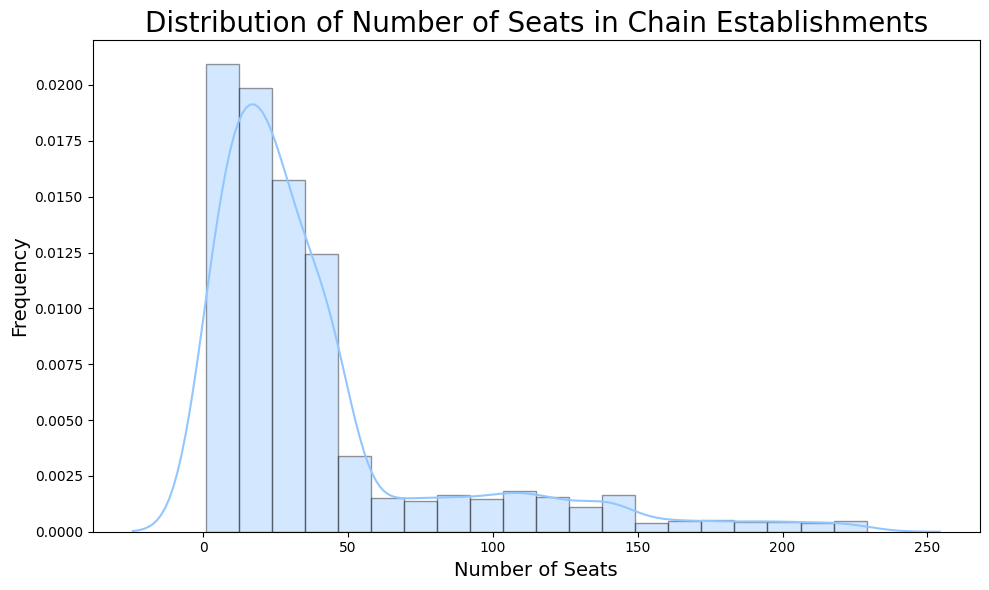

In [118]:
# Defining the figure size
plt.figure(figsize=(10, 6))

# Using sns.distplot to create the distribution plot
sns.distplot(df_chain['number'], bins=20, kde=True, hist_kws={'edgecolor': 'black'})

# Adding titles and informative labels
plt.title('Distribution of Number of Seats in Chain Establishments', fontsize=20)
plt.xlabel('Number of Seats', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.tight_layout()
plt.show()

**Conclusions:**  Most chain establishments have up to 50 seats for customers.

**4.5. Average Number of Seats by Restaurant Type.**

In [119]:
# Grouping data by type and calculating the average number of seats
df_seats = df_rest_data_us_upd.groupby('object_type')['number'].mean().reset_index().sort_values(by='number', ascending=False).round(2)

# Renaming columns
df_seats.columns= ['object_type', 'mean_seats']

# Verifying the results
df_seats

,object_type,mean_seats
5,Restaurant,48.05
1,Bar,44.77
3,Fast Food,31.84
4,Pizza,28.55
2,Cafe,25.00
0,Bakery,21.77


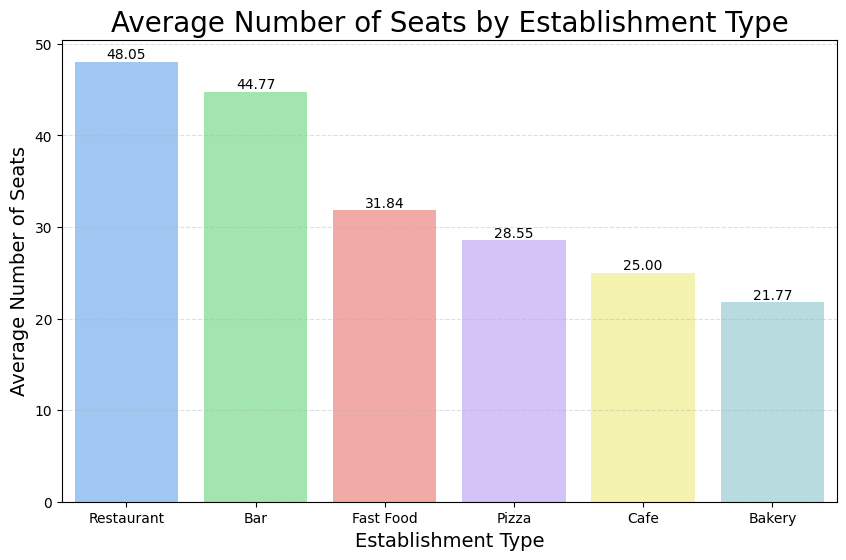

In [120]:
# Creating the chart
plt.figure(figsize=(10, 6))

sns.barplot(x='object_type', y='mean_seats', data= df_seats, hue='object_type')

# Adding the average values on top of each bar
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

# Customizing the chart
plt.title('Average Number of Seats by Establishment Type', fontsize = 20)
plt.xlabel('Establishment Type', fontsize = 14)
plt.ylabel('Average Number of Seats', fontsize = 14)
plt.grid(axis='y', alpha = 0.4, linestyle='--',  zorder=0)

plt.show()

**Conclusions:** Restaurants and bars generally have the highest average number of seats, exceeding 44. Fast-foods and pizzerias have an average of around 30 seats, while bakeries and cafes have between 21 and 25 seats.

**4.6. Extracting street names into a new column**

In [121]:
# Extracting the street number from the 'address' column
df_street = df_rest_data_us_upd['address'].str.split(" ", expand = True) 

# Displaying the result
df_street.sample(10)

,0,1,2,3,4,5,6,7,8
6820,404,S,FIGUEROA,ST,STE,#417,None,None,None
160,978,GAYLEY,AVE,None,None,None,None,None,None
9575,1630,E,CESAR,E,CHAVEZ,None,None,None,None
5801,356,E,2ND,ST,None,None,None,None,None
1998,3702,MEDFORD,ST,None,None,None,None,None,None
7697,3500,WILSHIRE,BLVD,None,None,None,None,None,None
2703,4600,COMPTON,AVE,None,None,None,None,None,None
7226,5857,S,CENTRAL,AVE,120,None,None,None,None
5618,8639,LINCOLN,BLVD,None,None,None,None,None,None
3899,123,9TH,ST,None,None,None,None,None,None


In [122]:
# Analyzing the results
DF_W = df_street[df_street[2]== 'W']
DF_W.head()

,0,1,2,3,4,5,6,7,8
131,6228,3/4,W,MANCHESTER,AVE,None,None,None,None
292,3002,1/2,W,7TH,ST,None,None,None,None
1012,3116,1/2,W,SUNSET,BLVD,None,None,None,None
1409,5233,1/2,W,SUNSET,BLVD,None,None,None,None
1453,9108,1/2,W,PICO,BLVD,None,None,None,None


In [123]:
# Concatenating the columns with a space
df_street['street_name'] = df_street[1].fillna('') + ' ' + \
                           df_street[2].fillna('') + ' ' + \
                           df_street[3].fillna('')

# Removing extra spaces (in case of empty columns or None values)
df_street['street_name'] = df_street['street_name'].str.strip()

# Displaying the DataFrame
print(df_street.head())


      0          1       2     3     4     5     6     7     8  \
0  3708          N   EAGLE  ROCK  BLVD  None  None  None  None   
1   100      WORLD     WAY   120  None  None  None  None  None   
2  6801  HOLLYWOOD    BLVD   253  None  None  None  None  None   
3  1814          W  SUNSET  BLVD  None  None  None  None  None   
4  2100       ECHO    PARK   AVE  None  None  None  None  None   

          street_name  
0        N EAGLE ROCK  
1       WORLD WAY 120  
2  HOLLYWOOD BLVD 253  
3       W SUNSET BLVD  
4       ECHO PARK AVE  


In [124]:
# Adding the street name information to the original dataframe
df_rest_data_us_upd['street_name'] = df_street['street_name']

# Verifying the first rows
df_rest_data_us_upd.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


**4.7. Plotting a chart of the top ten streets with the highest number of restaurants**

In [125]:
# Filtering only restaurant establishments
df_restaurants = df_rest_data_us_upd[df_rest_data_us_upd['object_type'] == 'Restaurant']

# Verifying a sample
df_restaurants.sample(5)

,id,object_name,address,chain,object_type,number,street_name
9532,21318,ENERGY LIFE CAFE,5670 WILSHIRE BLVD 160,False,Restaurant,44,WILSHIRE BLVD 160
2066,13852,PAULS KITCHEN,1012 S SAN PEDRO ST,False,Restaurant,69,S SAN PEDRO
8271,20057,LUCEROS #2,3540 E 1ST ST,False,Restaurant,6,E 1ST ST
1910,13696,THE DOUGH ROOM,3409 OVERLAND AVE,False,Restaurant,44,OVERLAND AVE
2712,14498,CEMITAS POBLANAS ELVIRITA,3010 E 1ST ST,False,Restaurant,33,E 1ST ST


In [126]:
# Counting the number of restaurants for each street
df_restaurants_count = df_restaurants['street_name'].value_counts().reset_index()

# Renaming the columns
df_restaurants_count.columns = ['street_name', 'count_rest']

# Selecting top 10 streets with the highest number of restaurants
df_top_10_restaurants = df_restaurants_count.head(10)

# Verifying the results
df_top_10_restaurants

,street_name,count_rest
0,W SUNSET BLVD,265
1,W PICO BLVD,255
2,S WESTERN AVE,217
3,SANTA MONICA BLVD,204
4,W OLYMPIC BLVD,202
5,W 3RD ST,181
6,W 6TH ST,177
7,S FIGUEROA ST,164
8,S VERMONT AVE,155
9,HOLLYWOOD BLVD,136


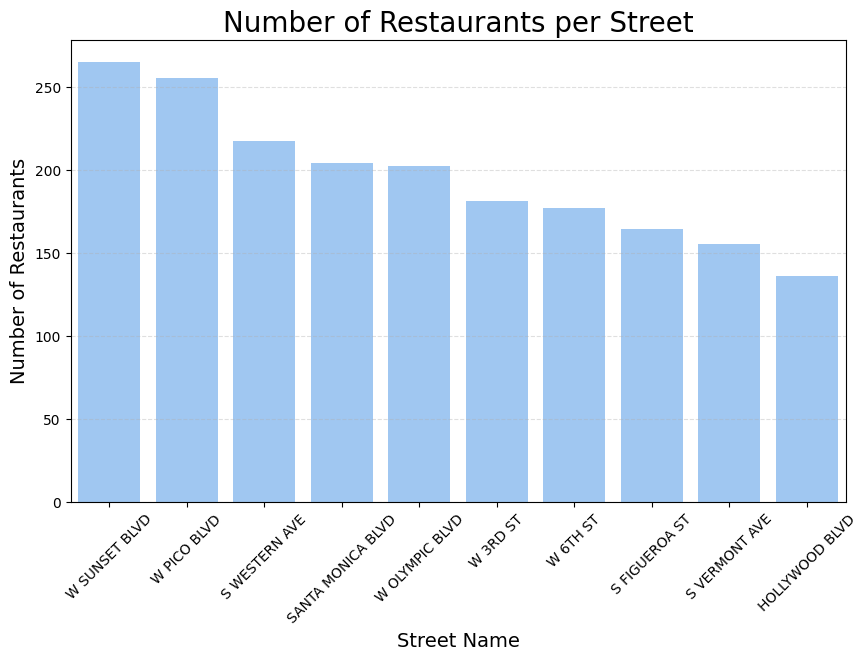

In [127]:
# Plotting the chart
plt.figure(figsize=(10, 6))

sns.barplot(x='street_name', y='count_rest',data=df_restaurants_top_10)

plt.title('Number of Restaurants per Street', fontsize=20)
plt.xlabel('Street Name', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)

plt.xticks(rotation=45)
plt.grid(axis='y', alpha = 0.4, linestyle='--',  zorder=0)

plt.show()

**Conclusions:** The streets with the highest concentration of restaurants are *W SUNSET BLVD* and *W PICO BLVD*, both having more than 250 restaurants.

**4.8. Finding the number of streets that have only one restaurant**

In [128]:
# Verifying the DataFrame's tail
df_restaurants_count.tail()

,street_name,count_rest
1050,DALY ST #102,1
1051,CORDOVA ST,1
1052,WASHINGTON PL A,1
1053,1/2 S FAIRFAX,1
1054,W TEMPLE AVE,1


In [129]:
# Filtering streets that have only 1 restaurant
df_01_rest_street = df_restaurants_count[df_restaurants_count['count_rest'] == 1]

# Verifying the results
df_01_rest_street.head()

,street_name,count_rest
424,WILEY POST AVE,1
425,BROADWAY PL #6,1
426,SAN FERNANDO RD,1
427,WILSHIRE BLVD 15,1
428,W 54TH ST,1


In [130]:
# Counting how many streets have only 1 restaurant
print("There are", df_01_rest_street['street_name'].nunique(), "streets with only 1 restaurant.")

There are 631 streets with only 1 restaurant.


**Conclusion:** There are 631 streets with only 1 restaurant.

- Plotting the distribution of restaurants per street

In [131]:
# Counting the number of streets that have X number of restaurants
rest_count_groupby = df_restaurants_count.groupby('count_rest')['street_name'].count().reset_index()

# Renaming the columns
rest_count_groupby.columns = ['number_of_restaurants', 'count_streets']

# Verifying the results
rest_count_groupby

,number_of_restaurants,count_streets
0,1,631
1,2,134
2,3,48
3,4,40
4,5,21
...,...,...
64,202,1
65,204,1
66,217,1
67,255,1


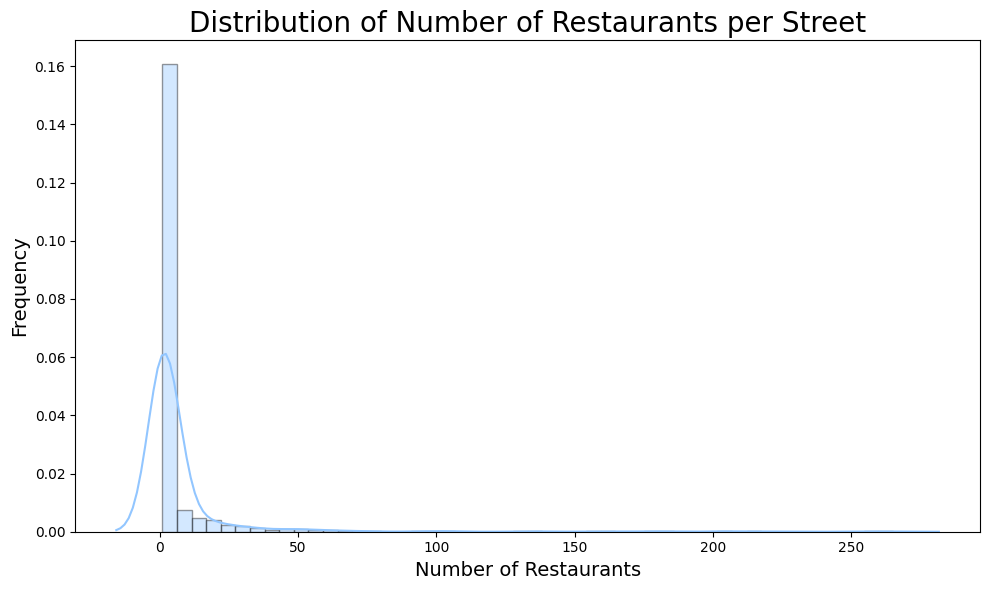

In [132]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Distribution of restaurants per street
# Using sns.distplot to create the distribution plot
sns.distplot(df_restaurants_count['count_rest'], bins=50, kde=True, hist_kws={'edgecolor': 'black'})

# Adding titles and labels
plt.title('Distribution of Number of Restaurants per Street', fontsize=20)
plt.xlabel('Number of Restaurants', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.tight_layout()
plt.show()


**Conclusions:** The data shows that most streets have only 01 or 02 restaurants, while streets with a large number of restaurants are less frequent.

**4.9. Distribution of Seats on Streets with Many Restaurants**

In [133]:
# Verifying the DataFrame with the top 10 streets with the most restaurants
df_top_10_restaurants

,street_name,count_rest
0,W SUNSET BLVD,265
1,W PICO BLVD,255
2,S WESTERN AVE,217
3,SANTA MONICA BLVD,204
4,W OLYMPIC BLVD,202
5,W 3RD ST,181
6,W 6TH ST,177
7,S FIGUEROA ST,164
8,S VERMONT AVE,155
9,HOLLYWOOD BLVD,136


In [134]:
# Converting the column into a list
top_10_streets_list = df_top_10_restaurants['street_name'].tolist()

# Verifying the result
print(top_10_streets_list)

['W SUNSET BLVD', 'W PICO BLVD', 'S WESTERN AVE', 'SANTA MONICA BLVD', 'W OLYMPIC BLVD', 'W 3RD ST', 'W 6TH ST', 'S FIGUEROA ST', 'S VERMONT AVE', 'HOLLYWOOD BLVD']


In [135]:
# Filtering the DataFrame to include only streets with the most restaurants from 'top_10_streets_list'
df_top_10_streets = df_restaurants[df_restaurants['street_name'].isin(top_10_streets_list)]

# Verifying the results
df_top_10_streets.head()

,id,object_name,address,chain,object_type,number,street_name
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,W 6TH ST
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,W SUNSET BLVD
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133,W 6TH ST
15,11801,FOOD COURT TRAY WASHING AREA,928 S WESTERN AVE STE 300,True,Restaurant,21,S WESTERN AVE


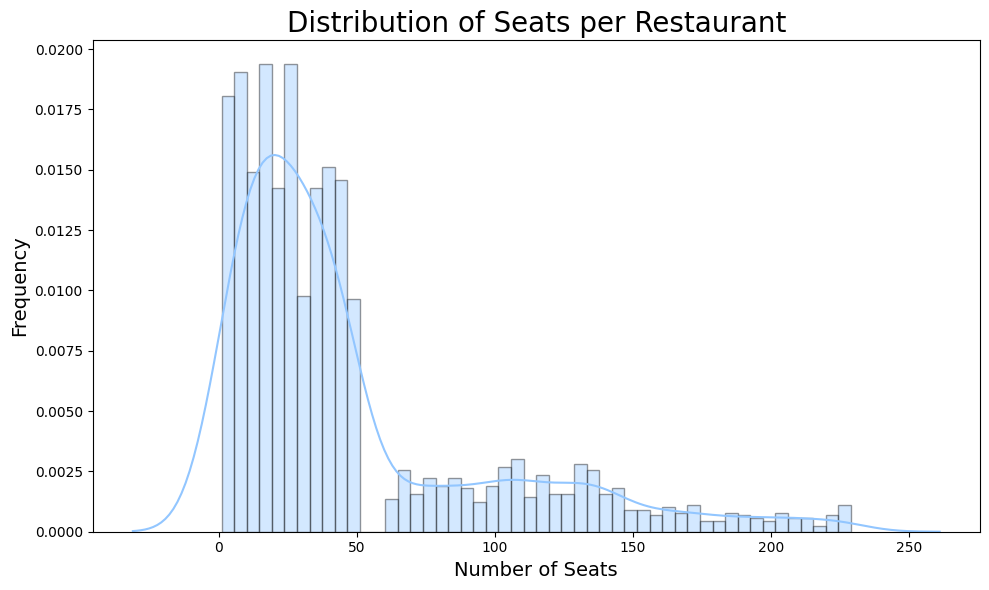

In [136]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Distribution of seats per restaurant
# Using sns.distplot to create the distribution plot
sns.distplot(df_top_10_streets['number'], bins=50, kde=True, hist_kws={'edgecolor': 'black'})

# Adding titles and labels
plt.title('Distribution of Seats per Restaurant', fontsize=20)
plt.xlabel('Number of Seats', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


**Conclusion:** According to the distribution chart, most restaurants on the 10 streets with the highest concentration of establishments have between 01 and 50 seats.

4.10. **General Conclusion and Recommendations**

- **Overall Conclusion of the Market Analysis:** 

Restaurants stand out in the analysis, accounting for more than 75% of the total data. The second most common type is fast food, with around 11%. Other types, such as cafes, pizzerias, bars, and bakeries, represent smaller percentages, ranging from 4.5% to 2.9%. Additionally, the data indicates that most establishments do not belong to chains, with 62% being independent.

When analyzing the remaining 38% of the data, which corresponds to chain establishments, we see that more than half of them are restaurants, followed by 16.5% of fast foods. Other types, such as cafes, pizzerias, and bars, represent between 7% and 4% of the data. The majority of chain establishments have up to 50 seats for customers. When examining the average seat counts by establishment type, we note that restaurants and bars have the highest average seat counts, over 44. Fast food and pizza establishments average around 30 seats, followed by cafes with 35 seats and bakeries with 21 seats.

The streets with the highest concentration of restaurants, such as *W SUNSET BLVD* and *W PICO BLVD*, each have more than 250 restaurants. However, when analyzing the distribution of the number of restaurants per street, we observe that there are few streets with many restaurants and many streets with only 01 or 02 establishments. Furthermore, the streets with the highest concentration of restaurants tend to have establishments with a number of seats ranging from 01 to 50. The frequency of restaurants with more than 200 seats is significantly lower compared to those with up to 50 seats.

- **Final Recommendations::** 
1. *Restaurant Demand:* 

**The demand for restaurant-type establishments is higher compared to the other types analyzed**, making this category a strong choice. In this context, it could be beneficial for the café to position itself as a restaurant, especially if investors are not interested in exploring the café market, the third most common type (4.5%). **However, it is important to consider the need for brand differentiation to stand out amid fierce competition. Therefore, the idea of robot waiters could be crucial to the establishment's success.**

2. *Chain vs Independent Restaurants:* 

Chain restaurants already have an established brand and customer base, which can be advantageous compared to independent restaurants. However, based on the market study in LA, **independent establishments make up the majority of businesses, indicating a local preference for non-chain restaurants.** This trend suggests that focusing on an independent concept might resonate better with the local community.

3. *Number of Seats:* 

**It was observed that most restaurants have up to 50 seats, with an average of 48 seats.** Restaurants with more than 50 seats are significantly less common. Therefore, the recommendation is to operate with a reduced number of seats according to local demand. As for cafés, the trend indicates that establishments typically have around 25 seats.

4. *Street Analysis:* 

Streets like '*W SUNSET BLVD*' and '*W PICO BLVD*' are highly competitive. It may be more advantageous to consider streets with lower restaurant density. However, it is essential to conduct a more in-depth analysis of the commercial viability of the area before making a final decision, such as whether these streets are located in residential or commercial zones. This will help ensure the long-term success and sustainability of the establishment.